# DSE 220  Homework 3

### Load  libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Perceptron_SVM
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC

# Custom kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import laplacian_kernel

# Disable warnings
import warnings
warnings.filterwarnings('ignore')


## Part 1: Logistic Regression 

### Question 1:
    
Perform a 80-20 split using train test split on the data to obtain the train and the test data. Set random state = 3 while performing the train test split. Use Logistic Regression to classify the wines according to their cultivators. Tune the classifier using Lasso and Ridge regularization techniques under different values of ’C’ using GridSearchCV. Clearly report the parameters of the best classifier and the accuracy on the test data. (10 marks).


In [2]:
# Load data.
wine = pd.read_csv('./wine_original.csv', delimiter=',')

# Split data into train and test dataset.
train,test = train_test_split(wine, test_size=0.2, random_state=3)

# Split data into feature data and label data. 
train_data = train.iloc[:,1:]
train_label = train['class']

test_data = test.iloc[:,1:]
test_label = test['class']

In [3]:
# Fit logistic regression model on trian dataset.
parameters = { 'penalty': ['l1','l2'], 
               'C':[0.1, 0.5, 1, 2, 3, 4, 5, 10]}
logreg = LogisticRegression()
clf = GridSearchCV(logreg, parameters)
clf.fit(train_data, train_label)

# Make prediction on test dataset. 
test_pred = clf.predict(test_data)
accuracy = accuracy_score(test_pred, test_label)
print ('Selected Parameters: ', clf.best_params_)
print ('Test Accuracy = ' + str(accuracy))

Selected Parameters:  {'C': 1, 'penalty': 'l1'}
Test Accuracy = 0.8888888888888888


## Part 2: Perceptron & Support Vector Machines
### Load data 

In [4]:
# Training dataset. 
train = datasets.fetch_20newsgroups(subset=('train'), remove=('headers', 'footers', 'quotes'),
                                    categories=('alt.atheism','comp.graphics','sci.space','talk.politics.mideast'))
train_data = train.data
y_train = train.target

# Test dataset.
test = datasets.fetch_20newsgroups(subset=('test'), remove=('headers', 'footers', 'quotes'),
                                   categories=('alt.atheism','comp.graphics','sci.space','talk.politics.mideast'))
test_data = test.data
y_test = test.target

### Vectorize 

We need to vectorize the documents to train our classifier. Use the TfidfVectorizer to get vectors of the documents (after smoothing1). A common practice is to convert all the documents to lowercase and remove stopwords like a, and, the etc. Use the stopwords set provided by ’nltk.corpus.stopwords’. Take advantage of the parameters provided by the TfidfVectorizer to convert to low- ercase and remove stopwords. (10 marks)

In [5]:
# Get stop words. 
from nltk.corpus import stopwords 
stopwords = set(stopwords.words('english')) 

In [6]:
# Vectorize the documents.
vectorizer = TfidfVectorizer(smooth_idf=True, lowercase=True, stop_words=stopwords)
vectorizer.fit(train_data)

X_train = vectorizer.transform(train_data)
X_test = vectorizer.transform(test_data)

### Question 2:

After obtaining the tf-idf vectors for train and test data, use the perceptron model (no penalty) to train on the training vectors and compute the accuracy on the test vectors. (5 marks)


In [7]:
# Model
clf = Perceptron(penalty=None)

# Fit model on training data.
clf.fit(X_train, y_train)

# Make prediction on test data.
y_pred = clf.predict(X_test)
print ('Test accuracy = ' + str(accuracy_score(y_test, y_pred)))

Test accuracy = 0.8078484438430311


### Question 3:

Keeping all the above data processing steps same, observe how the test accuracy changes by varying the number of top features selected for 100, 200, 500, 1000, 1500, 2000, 4000, 10000, 20000, 30000 for a perceptron model. Report and plot the results. Provide a brief explanation of the observed results. (10 mark)

In [8]:
max_features=[100,200,500,1000,1500,2000,4000,10000,20000,30000]
accuracies = []
for n in max_features:
    # Vectorize the documents.
    vectorizer = TfidfVectorizer(smooth_idf=True, lowercase=True, 
                                 stop_words=stopwords, max_features=n)
    vectorizer.fit(train_data)

    X_train_sample = vectorizer.transform(train_data)
    X_test_sample = vectorizer.transform(test_data)
    
    # Model
    clf = Perceptron(penalty=None)

    # Fit model on training data.
    clf.fit(X_train_sample, y_train)

    # Make prediction on test data.
    y_pred = clf.predict(X_test_sample)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print('Number of top features: {},  test accuracy: {}'.format(n,accuracy))


Number of top features: 100,  test accuracy: 0.6069012178619756
Number of top features: 200,  test accuracy: 0.6732070365358592
Number of top features: 500,  test accuracy: 0.7300405953991881
Number of top features: 1000,  test accuracy: 0.7422192151556157
Number of top features: 1500,  test accuracy: 0.7523680649526387
Number of top features: 2000,  test accuracy: 0.7686062246278755
Number of top features: 4000,  test accuracy: 0.7909336941813261
Number of top features: 10000,  test accuracy: 0.8125845737483085
Number of top features: 20000,  test accuracy: 0.8166441136671178
Number of top features: 30000,  test accuracy: 0.8031123139377537


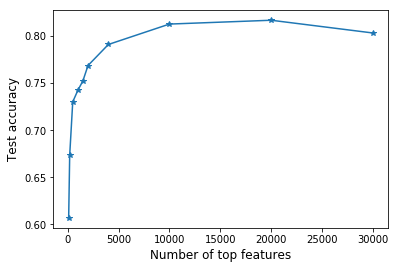

In [9]:
# Plot the auccuracies on test data.
plt.plot(max_features,accuracies,'*-')
plt.xlabel('Number of top features',fontsize=12)
plt.ylabel('Test accuracy',fontsize=12)
plt.show()

### Question 4:

After obtaining the tf-idf vectors for train and test data, use the SVM model to train on the training vectors and compute the accuracy on the test vectors. Use linear kernel and default parameters. (5 mark)

In [10]:
# Model
clf = SVC(kernel='linear')
# Fit
clf.fit(X_train, y_train)
# Predict 
pred = clf.predict(X_test)
# Evaluate
print ('Test accuracy = ' + str(accuracy_score(y_test, pred)))

Test accuracy = 0.8335588633288228


### Question 5:

Keeping all the above data processing steps same observe how the test accuracy changes by varying the number of top features selected for 100, 200, 500, 1000, 1500, 2000, 4000, 10000, 20000, 30000 for a linear SVM model. Report and plot the results. Provide a brief explanation of the observed results. (10 mark)

In [11]:
max_features=[100,200,500,1000,1500,2000,4000,10000,20000,30000]
accuracies = []
for n in max_features:
    # Vectorize the documents.
    vectorizer = TfidfVectorizer(smooth_idf=True, lowercase=True, 
                                 stop_words=stopwords, max_features=n)
    vectorizer.fit(train_data)

    X_train_sample = vectorizer.transform(train_data)
    X_test_sample = vectorizer.transform(test_data)
    
    # Model
    clf = SVC(kernel='linear')
    
    # Fit model on training data.
    clf.fit(X_train_sample, y_train)

    # Make prediction on test data.
    y_pred = clf.predict(X_test_sample)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print('Number of top features: {},  test accuracy: {}'.format(n,accuracy))


Number of top features: 100,  test accuracy: 0.652232746955345
Number of top features: 200,  test accuracy: 0.6921515561569689
Number of top features: 500,  test accuracy: 0.7422192151556157
Number of top features: 1000,  test accuracy: 0.7672530446549392
Number of top features: 1500,  test accuracy: 0.7767253044654939
Number of top features: 2000,  test accuracy: 0.7855209742895806
Number of top features: 4000,  test accuracy: 0.8213802435723951
Number of top features: 10000,  test accuracy: 0.8328822733423545
Number of top features: 20000,  test accuracy: 0.8315290933694182
Number of top features: 30000,  test accuracy: 0.8328822733423545


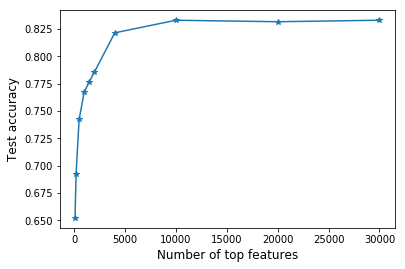

In [12]:
# Plot the auccuracies on test data.
plt.plot(max_features,accuracies,'*-')
plt.xlabel('Number of top features',fontsize=12)
plt.ylabel('Test accuracy',fontsize=12)
plt.show()

### Question 6:

Perform 80-20 split of the training data to obtain validation data using train test split (random state=10). Use this validation data to tune the regularization parameter ’C’ for values 0.01,0.1,1,10,100. Select the best ’C’ and compute the accuracy for the test data. Report the validation and test accuracies. Use feature vectors of 2000 dimensions.(10 marks)

In [13]:
# Vectorize the documents(2000 dimensions).
vectorizer = TfidfVectorizer(smooth_idf=True, lowercase=True, stop_words=stopwords, max_features=2000)
vectorizer.fit(train_data)

X_train_2000 = vectorizer.transform(train_data)
X_test_2000 = vectorizer.transform(test_data)

# Split training data into train-validation dataset.
train_X, vali_X, train_y, vali_y = train_test_split(X_train_2000, y_train, test_size=0.2, random_state=10)


In [14]:
# Tune the regularization parametier 'C'.
C=[0.01, 0.1, 1, 10, 100]
vali_accuracy={}
for c in C:
    
    # Model
    clf = SVC(C=c,kernel='linear')
    
    # Fit model on training data.
    clf.fit(train_X, train_y)

    # Make prediction on test data.
    vali_pred_y = clf.predict(vali_X)
    accuracy = accuracy_score(vali_y, vali_pred_y)
    vali_accuracy[c]=accuracy 

# Best_C
best_c = max(vali_accuracy, key=vali_accuracy.get)
validation_accuracy = max(vali_accuracy.values())
print('C value and validation accuracy:\n', vali_accuracy)
print('\nThe best C value is {}, and the validation accuracy is {}'.format(best_c, validation_accuracy))


C value and validation accuracy:
 {0.01: 0.2449438202247191, 0.1: 0.7573033707865169, 1: 0.8449438202247191, 10: 0.8224719101123595, 100: 0.8}

The best C value is 1, and the validation accuracy is 0.8449438202247191


In [15]:
# Model
clf = SVC(C=best_c,kernel='linear')
    
# Fit model on training data.
clf.fit(X_train_2000, y_train)

# Make prediction on test data.
test_pred_y = clf.predict(X_test_2000)
accuracy = accuracy_score(y_test, test_pred_y)

print('C= {},  Test accuracy= {}'.format(best_c,accuracy))

C= 1,  Test accuracy= 0.7855209742895806


### Question 7: 

Use the same train and validation split as the previous question. Train a kernelized SVM (with ’C’=10000) with kernel values - ’poly’ with degree 1, 2, 3, ’rbf ’ and ’sigmoid’, and report the one with best accuracy on validation data. Report the test accuracy for the selected kernel. (10 marks)


In [16]:
kernels=['poly', 'rbf','sigmoid']
degrees =[1, 2, 3]
vali_accuracies={}

for k in kernels:
    
    if k == 'poly':
        for d in degrees:
            clf = SVC(C=10000, kernel=k,degree=d)
            clf.fit(train_X, train_y)
            vali_pred_y = clf.predict(vali_X)
            accuracy = accuracy_score(vali_y, vali_pred_y)
            vali_accuracies[(k,d)] = accuracy
            print('kernel: {}, validation accuracy= {}'.format((k,d), accuracy))
    else:
        clf = SVC(C=10000, kernel=k)
        clf.fit(train_X, train_y)
        vali_pred_y = clf.predict(vali_X)
        accuracy = accuracy_score(vali_y, vali_pred_y)
        vali_accuracies[k] = accuracy
        print('kernel: {},   validation accuracy= {}'.format(k,accuracy))


kernel: ('poly', 1), validation accuracy= 0.8224719101123595
kernel: ('poly', 2), validation accuracy= 0.2449438202247191
kernel: ('poly', 3), validation accuracy= 0.2449438202247191
kernel: rbf,   validation accuracy= 0.8224719101123595
kernel: sigmoid,   validation accuracy= 0.8224719101123595


In [17]:
# Select best kernel and validation accuracy.
max_accuracy = max(vali_accuracies.values())
best_kernel = [k for k, v in vali_accuracies.items() if v == max_accuracy]
print('The best validation accuracy: {}, kernel: {}'.format(max_accuracy, best_kernel))

The best validation accuracy: 0.8224719101123595, kernel: [('poly', 1), 'rbf', 'sigmoid']


In [18]:
for K in best_kernel:
    if type(K) is tuple:
        clf = SVC(C=10000, kernel=K[0], degree=K[1])
    else: 
        clf = SVC(C=10000, kernel=K)
    
        clf.fit(X_train_2000, y_train)
        test_pred_y = clf.predict(X_test_2000)
        accuracy=accuracy_score(y_test, test_pred_y)
        
    print('Kernel: {}, Test accuracy= {}'.format(K,accuracy))

Kernel: ('poly', 1), Test accuracy= 0.8224719101123595
Kernel: rbf, Test accuracy= 0.7638700947225981
Kernel: sigmoid, Test accuracy= 0.7652232746955345


## Part 3: Custom Kernel

### Question 8:

Use **Cosine Similarity** and **Laplacian Kernel** measures, and report the test accuracies using these kernels with SVM. (15 marks)

In [19]:
for K in [cosine_similarity, laplacian_kernel]:
    clf = SVC(kernel=K)
    clf.fit(X_train_2000,y_train)

    # Prediction 
    pred = clf.predict(X_test_2000)
    accuracy = accuracy_score(y_test, pred)
    print(K,' Test accuracy = ', accuracy)

<function cosine_similarity at 0x1078e07b8>  Test accuracy =  0.7855209742895806
<function laplacian_kernel at 0x1078e0730>  Test accuracy =  0.2665764546684709


### Question 9:

Another way to construct a kernel is use a linear combination of 2 kernels. 

Let K be a kernel represented as:   $K(x,y)=αK_{1}(x,y)+(1−α)K_{2}(x,y) (0≤α≤1)$

Provide a brief explanation of why K is a valid kernel. Does your reasoning hold true for other values of α as well? Let K1 be the Cosine Similarity and K2 be the Laplacian Kernel. Using K as kernel, train a SVM model to tune the value of α (upto one decimal) and report the accuracy on the test data using the selected parameter. (15 marks)

In [20]:
# Kernel function.
def my_kernel(X,y):
    K1=cosine_similarity(X,y)
    K2=laplacian_kernel(X,y)
    K=a*K1+(1-a)*K2     
    return K

In [21]:
alpha=np.arange(0, 1.1, 0.1)
results={}

# Fit model with different alpha values.
for a in alpha:
    clf = SVC(kernel=my_kernel)
    clf.fit(train_X,train_y)
    accuracy=accuracy_score(vali_y, clf.predict(vali_X))
    results[a]=accuracy
    print('alpha= {:.2}, validation accuraty= {}'.format(a,accuracy))

alpha= 0.0, validation accuraty= 0.2449438202247191
alpha= 0.1, validation accuraty= 0.7640449438202247
alpha= 0.2, validation accuraty= 0.8179775280898877
alpha= 0.3, validation accuraty= 0.8359550561797753
alpha= 0.4, validation accuraty= 0.8382022471910112
alpha= 0.5, validation accuraty= 0.8471910112359551
alpha= 0.6, validation accuraty= 0.851685393258427
alpha= 0.7, validation accuraty= 0.8539325842696629
alpha= 0.8, validation accuraty= 0.8449438202247191
alpha= 0.9, validation accuraty= 0.8471910112359551
alpha= 1.0, validation accuraty= 0.8449438202247191


In [22]:
# Select the best alpha.
best_alpha = max(results, key=results.get)

# Molel
a = best_alpha
clf = SVC(kernel=my_kernel)

# Fit model on training(train+vali) data.
clf.fit(X_train_2000,y_train)

# Prediction
pred = clf.predict(X_test_2000)
accuracy=accuracy_score(y_test, pred)
print('alpha= {:.2}, Test accuraty= {}'.format(a,accuracy))

alpha= 0.7, Test accuraty= 0.793640054127199
